Importing the libraries & loading the dataset

In [23]:
# General libraries
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, ylabel
%matplotlib inline

# Feature Selection Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from mrmr import mrmr_classif
from sklearn.feature_selection import SelectKBest


In [2]:
# loading the dataset
parquet_file = ('data/TM_NE_data')
df = pd.read_parquet(parquet_file, engine='auto')
print (df.shape)

(181054, 69)


In [3]:
df.head()

,A Symbol,Atomic Number 1,Coefficient 1,B Symbol,Atomic Number 2,Coefficient 2,C Symbol,Atomic Number 3,Coefficient 3,A Group,...,C - rs [A],C - Lowest unocc KS level [eV],C - Highest occ KS level [eV],C - Electroneg,C - e Affin,C - Ioniz Pot,gamma,Oxidation 1,Oxidation 2,Oxidation 3
0,Ag,47,4,Al,13,1,Re,75,1,11,...,0.000,0.000,0.000,0.000,0.000,0.000,1.570796,1,-1,-3
1,Ag,47,4,Al,13,1,Rh,45,1,11,...,0.000,0.000,0.000,0.000,0.000,0.000,1.570796,1,-1,-3
2,Ag,47,4,Al,13,1,Sb,51,1,11,...,1.001,0.105,-4.991,5.158,-1.847,-8.468,1.570796,1,-1,-3
3,Ag,47,4,As,33,1,Ge,32,1,11,...,0.917,2.175,-4.046,4.258,-0.949,-7.567,1.570796,1,-1,-3
4,Ag,47,4,As,33,1,Ir,77,1,11,...,0.000,0.000,0.000,0.000,0.000,0.000,1.570796,1,-1,-3


In [4]:
# Check for null values
print('Null values per column: \n',df.isnull().sum(), '\n total null values: ', df.isnull().sum().sum() ,end='\n\n')


Null values per column: 
 A Symbol           0
Atomic Number 1    0
Coefficient 1      0
B Symbol           0
Atomic Number 2    0
                  ..
C - Ioniz Pot      0
gamma              0
Oxidation 1        0
Oxidation 2        0
Oxidation 3        0
Length: 69, dtype: int64 
 total null values:  0



In [5]:
# Basic stats for the dataset
df.describe()

,Atomic Number 1,Coefficient 1,Atomic Number 2,Coefficient 2,Atomic Number 3,Coefficient 3,A Group,B Group,C Group,A Period,...,C - rs [A],C - Lowest unocc KS level [eV],C - Highest occ KS level [eV],C - Electroneg,C - e Affin,C - Ioniz Pot,gamma,Oxidation 1,Oxidation 2,Oxidation 3
count,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,...,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000,181054.000000
mean,36.025335,1.589471,40.217300,1.410883,44.536260,1.803158,9.636037,9.124432,10.034255,4.251389,...,0.425257,0.114435,-2.179724,2.177122,-0.587072,-3.767325,1.778973,2.161339,-0.028572,-1.751930
std,22.735199,1.044767,22.882748,0.846623,23.064145,1.261257,5.082345,4.953312,4.681590,1.279033,...,0.551656,0.635882,2.794392,2.802813,1.051828,4.779353,0.256522,1.347820,1.888336,1.026318
min,3.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,-1.309000,-11.294000,0.000000,-4.273000,-19.404000,1.047198,1.000000,-5.000000,-5.000000
25%,19.000000,1.000000,22.000000,1.000000,23.000000,1.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,-4.163000,0.000000,-1.039000,-7.758000,1.570796,1.000000,-1.000000,-2.000000
50%,32.000000,1.000000,37.000000,1.000000,42.000000,1.000000,11.000000,9.000000,11.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.570796,2.000000,-1.000000,-1.000000
75%,49.000000,2.000000,53.000000,1.000000,73.000000,3.000000,14.000000,14.000000,14.000000,5.000000,...,0.938000,0.099000,0.000000,4.375000,0.000000,0.000000,2.094395,3.000000,1.000000,-1.000000
max,83.000000,19.000000,83.000000,10.000000,83.000000,33.000000,17.000000,17.000000,17.000000,6.000000,...,2.464000,3.057000,0.000000,11.839000,1.081000,0.000000,2.094395,7.000000,7.000000,-1.000000


In [6]:
# S
g = df['SG #'].value_counts()

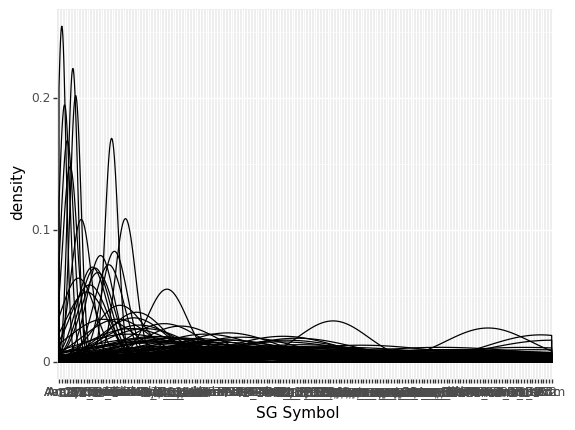

<ggplot: (143727282828)>

In [7]:
(ggplot(df, aes(x='SG Symbol'))
 + geom_density()
)

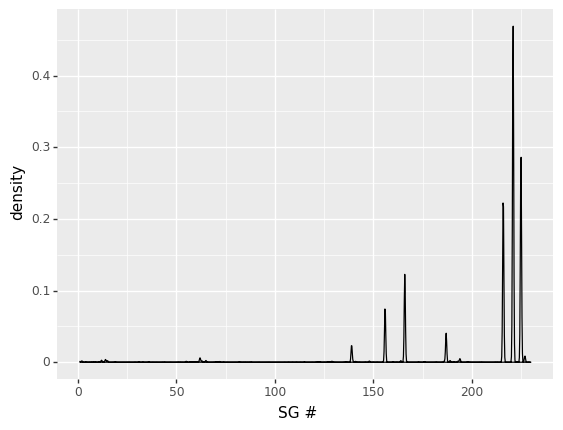

<ggplot: (143614440073)>

In [8]:
(ggplot(df, aes(x='SG #'))
 + geom_density()
)

<AxesSubplot:title={'center':'Top 10 Space Group Distribution'}, xlabel='Space Group Symbol', ylabel='Count'>

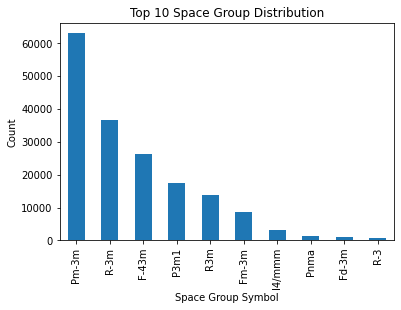

In [9]:
# Top 10 SG dist
sgc = df['SG Symbol'].value_counts()
sgct = sgc.head(10)
sgct.plot(kind='bar', title='Top 10 Space Group Distribution', ylabel='Count', xlabel='Space Group Symbol')

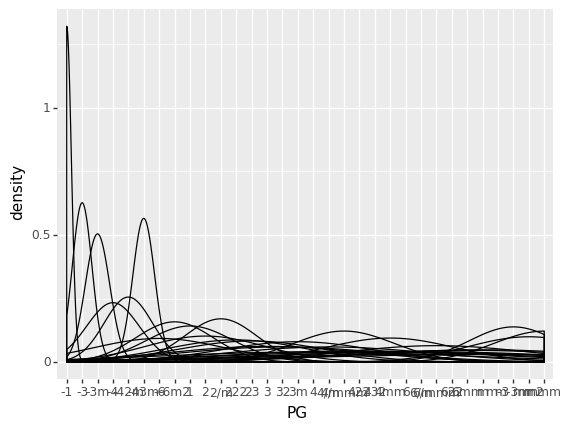

<ggplot: (143614314932)>

In [10]:
# PG density plot
(ggplot(df, aes(x='PG'))
 + geom_density()
)

<AxesSubplot:title={'center':'Point Group Distribution'}, xlabel='Point Group Symbol', ylabel='Count'>

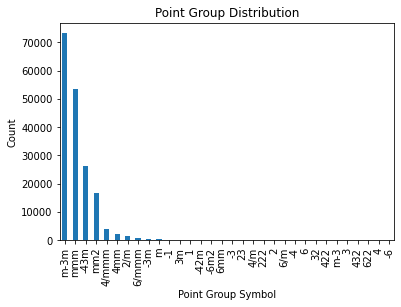

In [11]:
# Ploting point groups distribution
pgc = df['PG'].value_counts()
pgc.plot(kind = 'bar', title='Point Group Distribution', ylabel='Count', xlabel='Point Group Symbol')

<AxesSubplot:title={'center':'Top 10 Point Group Distribution'}, xlabel='Point Group Symbol', ylabel='Count'>

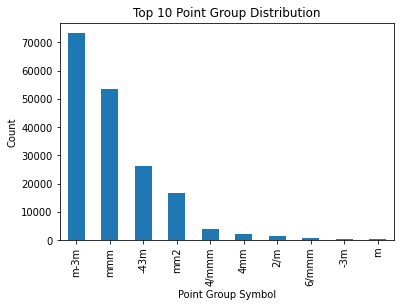

In [12]:
# Top 10 PG 
pgct = pgc.head(10)
pgct.plot(kind = 'bar', title='Top 10 Point Group Distribution', ylabel='Count', xlabel='Point Group Symbol')

<AxesSubplot:title={'center':'Crystal System Distribution'}, xlabel='Crystal System', ylabel='Count'>

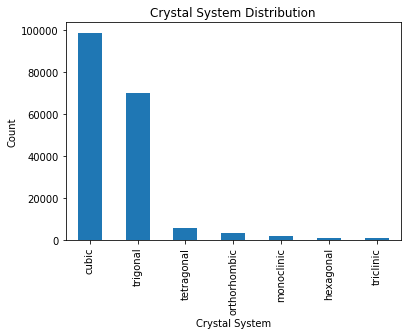

In [13]:
crysys = df['Crystal System'].value_counts()
crysys.plot(kind = 'bar', title='Crystal System Distribution', ylabel='Count', xlabel='Crystal System')

In [14]:
# All value counts for all variables collectively
for col in df.columns:
    print(df[col].value_counts().to_frame(), end='\n\n')
    print(10*'/-\-')

    A Symbol
Ag      9418
B       8064
Al      7967
As      7956
Ba      7692
..       ...
Tb        20
W         19
Tm         9
Y          8
Yb         1

[68 rows x 1 columns]

/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-
    Atomic Number 1
47             9418
5              8064
13             7967
33             7956
56             7692
..              ...
65               20
74               19
69                9
39                8
70                1

[68 rows x 1 columns]

/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-
    Coefficient 1
1          124624
2           22616
3           21309
4           10983
6             596
5             428
7             160
8             122
9             118
10             41
16             16
13             14
11             11
12              9
19              3
14              3
15              1

/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-/-\-
    B Symbol
Mn      5948
P       5787
Ni      5748
Mo      5688
Nb      5352
..       ...
Tb       215
Ag  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181054 entries, 0 to 181053
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   A Symbol                        181054 non-null  object 
 1   Atomic Number 1                 181054 non-null  int64  
 2   Coefficient 1                   181054 non-null  int64  
 3   B Symbol                        181054 non-null  object 
 4   Atomic Number 2                 181054 non-null  int64  
 5   Coefficient 2                   181054 non-null  int64  
 6   C Symbol                        181054 non-null  object 
 7   Atomic Number 3                 181054 non-null  int64  
 8   Coefficient 3                   181054 non-null  int64  
 9   A Group                         181054 non-null  int64  
 10  B Group                         181054 non-null  int64  
 11  C Group                         181054 non-null  int64  
 12  A Period        

# Feature Selection
    * Correlation Matrix
    * Neighborhood Component Analysis (NCA)
    * minimum-Redundancy Maximum-Relevance (mRMR)

In [ ]:
# Droping physically not important features
x = df.drop( columns= ['A Symbol', 'B Symbol', 'C Symbol', 'Formula','SG Symbol', 'SG #'])
# initiaing the target
y = df['SG #']

In [ ]:
# Encoding & splitting data
x['Crystal System'] = LabelEncoder().fit_transform(x['Crystal System'])
x['PG'] = LabelEncoder().fit_transform(x['PG'])
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1, shuffle= True)

<AxesSubplot:>

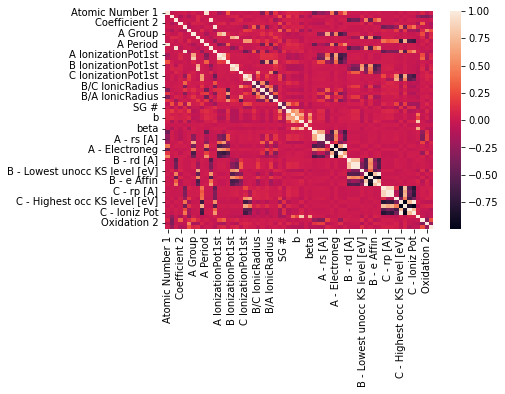

In [15]:
# Pearson Correlation & Corr heatmap
correlations = df.corr(method='pearson')
sns.heatmap(correlations)

In [27]:
# Select upper triangle of correlation matrix
upper = abs(correlations).where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['C Period',
 'A - rs [A]',
 'A - Electroneg',
 'A - Ioniz Pot',
 'B - rs [A]',
 'B - Electroneg',
 'B - Ioniz Pot',
 'C - rs [A]',
 'C - Electroneg',
 'C - Ioniz Pot']

In [ ]:
# Drop features 
# dfcorr = df.drop(to_drop, axis=1, inplace=True)

In [18]:
# Feature selection using NCA
#X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.1, random_state=1, shuffle= True)
#nca = NeighborhoodComponentsAnalysis(random_state=1)
#nca.fit(X_train, y_train)

In [19]:
# select top 10 features using mRMR
from mrmr import mrmr_classif

selected_features = mrmr_classif(X=X_train, y=y_train, K=10)

100%|██████████| 10/10 [00:03<00:00,  2.58it/s]


In [20]:
selected_features

['PG',
 'a',
 'No. of Atoms',
 'Crystal System',
 'gamma',
 'alpha',
 'c',
 'cell_volume',
 'b',
 'beta']